In [51]:
#importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [52]:
#creating dataframe
df=pd.read_csv("C:/Users/somaa/Downloads/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

C:\Users\somaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

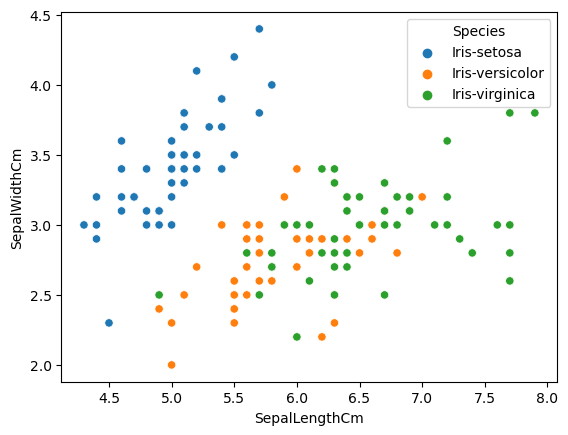

In [54]:
sns.scatterplot(df.SepalLengthCm,df.SepalWidthCm, data=df, hue="Species")

In [55]:
df.drop(columns=["Species","Id"],axis=1,inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [56]:
#Scaling data
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

df_scaled = scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[
  'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
 
df_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [ ]:
#K means clustering

km=KMeans

C:\Users\somaa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'SSE')

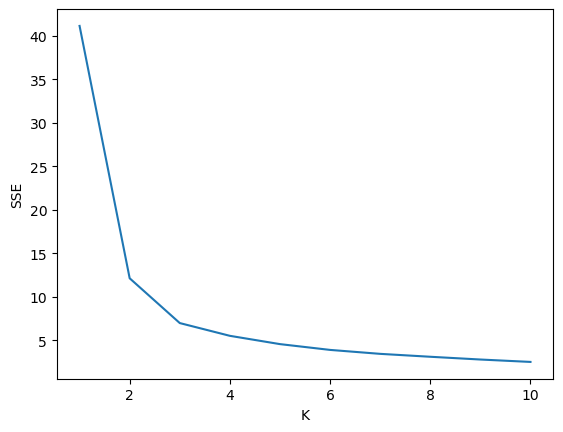

In [57]:
#checking optimum k value using elbow technique
from sklearn.cluster import KMeans
K_rng= range(1,11)
sse=[]
for k in K_rng:
    km=KMeans(n_clusters=k)
    km.fit(df_scaled)
    sse.append(km.inertia_)
    
plt.plot(K_rng,sse)
plt.xlabel("K")
plt.ylabel("SSE")

In [61]:
KM=KMeans(n_clusters=3)
y_pred=KM.fit_predict(df_scaled[["SepalLengthCm","SepalWidthCm"]])
df_scaled["cluster"]=y_pred
KM.cluster_centers_


array([[0.40483539, 0.28009259],
       [0.19897959, 0.60034014],
       [0.69562648, 0.45390071]])

C:\Users\somaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\somaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

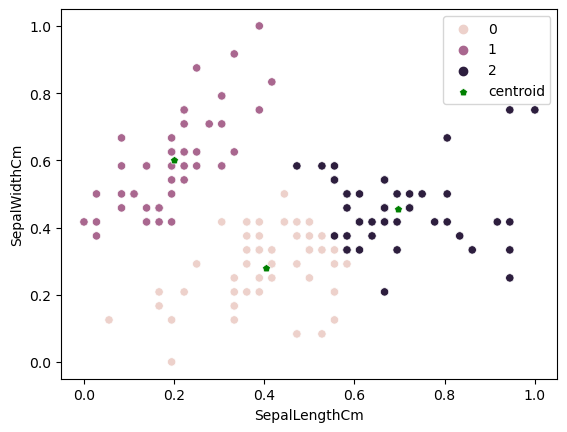

In [65]:
sns.scatterplot(df_scaled.SepalLengthCm,df_scaled.SepalWidthCm, hue=df_scaled.cluster)
sns.scatterplot(KM.cluster_centers_[:,0],KM.cluster_centers_[:,1],color="green",marker="p", label="centroid")

In [66]:
KM=KMeans(n_clusters=3)
y_pred=KM.fit_predict(df_scaled[["PetalLengthCm","PetalWidthCm"]])
df_scaled["cluster"]=y_pred
KM.cluster_centers_


array([[0.7740113 , 0.81510417],
       [0.07864407, 0.06      ],
       [0.55867014, 0.51041667]])

C:\Users\somaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\somaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

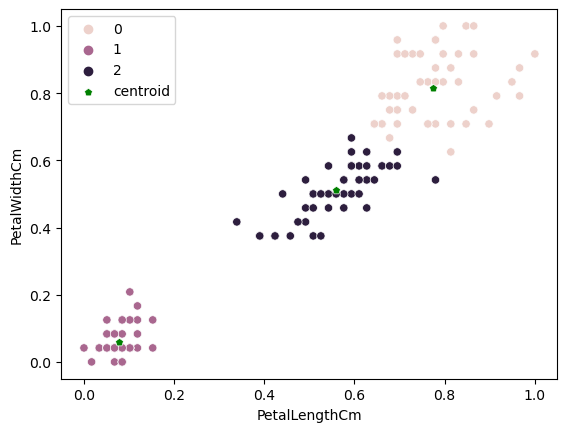

In [67]:
sns.scatterplot(df_scaled.PetalLengthCm,df_scaled.PetalWidthCm, hue=df_scaled.cluster)
sns.scatterplot(KM.cluster_centers_[:,0],KM.cluster_centers_[:,1],color="green",marker="p", label="centroid")